# **Proyecto: Preprocesamiento de Datos**

**Objetivo del proyecto**: Este proyecto tiene como objetivo hacer una limpieza de datos para su posterior exploración de datos.

**Índice:**
-    Carga de los datos.
-    Evaluación inicial del dataset.
-    Transformación de los datos: Tipos de datos - Valores ausentes - Valores duplicados.
-    Data lista para su posterior exploración de datos.
-    Conclusiones finales.
    

# **Carga de los Datos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AnaHerreraC/LimpiezaDatosFinanzas/main/dataset_emprendimiento_finanzas.csv')

In [3]:
data.head()

,id,fecha,cliente,producto,cantidad,precio_unitario,total,metodo_pago,canal_venta,entrega_domicilio,estado_pago
0,1,04/04/2025,DAWN RAMIREZ,Plan contable básico,3,34.28,102.84,tdc,Página Web,Sí,NaN
1,2,2025-02-24,Marcus Barnett,Plan Contable Básico,5,270.98,1354.90,Efectivo,Página Web,Sí,Pagado
2,3,2025-03-29,Tammy Lynch,Asesoría Financiera,3,218.56,655.68,Transferencia,WhatsApp,No,Pagado
3,4,2025-03-11,Sarah Harris,Simulación de Inversión,1,281.10,281.10,Efectivo,WhatsApp,No,Pagado
4,5,2025-04-10,Shannon Gonzalez,Asesoría Financiera,4,207.33,829.32,Efectivo,Referido,No,Pendiente


**Diccionario**:
-    `id`: El identificador único de cada venta.
-    `fecha`: Día en que se realizó la venta.
-    `cliente`: Nombre del cliente que compró algo.
-    `producto`: El servicio o producto vendido, como “Asesoría Financiera” o “Plan Contable Básico”.
-    `cantidad`: Cuántas unidades compró el cliente.
-    `precio_unitario`: El precio por cada unidad del producto.
-    `total`: Multiplicación de cantidad por precio unitario (es lo que pagó en total).
-    `metodo_pago`: Cómo pagaron (efectivo, transferencia, tarjeta de crédito, etc.).
-    `canal_venta`: Por dónde se realizó la venta (Instagram, WhatsApp, Página Web, etc.).
-    `entrega_domicilio`: Si se entregó a domicilio o no.
-    `estado_pago`: Si el pago fue “Pagado”, “Pendiente” o está vacío (no registrado).

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 105 non-null    int64  
 1   fecha              105 non-null    object 
 2   cliente            105 non-null    object 
 3   producto           105 non-null    object 
 4   cantidad           105 non-null    int64  
 5   precio_unitario    105 non-null    float64
 6   total              105 non-null    float64
 7   metodo_pago        105 non-null    object 
 8   canal_venta        105 non-null    object 
 9   entrega_domicilio  105 non-null    object 
 10  estado_pago        70 non-null     object 
dtypes: float64(2), int64(2), object(7)
memory usage: 9.2+ KB


**Evaluación inicial del dataset**:

Se puede observar que:
-    la base de datos tiene 105 filas, 11 columnas de las cuales: 2 tienen valores enteros, 7 valores tipo object y 2 tipo flotante. 
-    La columna `estado_pago`tiene 35 valores ausentes, lo que equivale al 36% de los datos.
-    La columna `fecha` no esta en el formato correspondiente `datetime`.
-    `cliente` tiene los nombre en diferentes formatos, mayúsculas, minúsculas, combinados.
-    En la columna `producto` se detectaron valores duplicados con el mismo significado, lo que podría indicar la necesidad de estandarización.


# **Exploración y transformación de los datos**:

Se realizará una exploración detallada de todas las columnas con el fin de identificar posibles inconsistencias, valores atípicos o faltantes. Posteriormente, se aplicarán distintos criterios de limpieza y transformación de los datos para asegurar su calidad y coherencia antes del análisis o modelado.

**Fecha:** Los datos estarán limpios y en tipo `datetime`:

In [5]:
data['fecha'].sample(8, random_state = 12)

7     2024-11-15
36    2024-12-24
46    2024-11-13
17    2025-01-02
21    2024-12-24
90    03/01/2025
39    2024-11-08
72    2025-04-19
Name: fecha, dtype: object

In [6]:
data.fecha = data['fecha'].str.replace('/', '-', regex = False)

In [7]:
data['fecha_tipo'] = pd.to_datetime(data['fecha'], errors = 'coerce', format = '%Y-%m-%d')

In [8]:
data['fecha_tipo']

0            NaT
1     2025-02-24
2     2025-03-29
3     2025-03-11
4     2025-04-10
         ...    
100   2025-01-16
101   2025-02-07
102          NaT
103          NaT
104   2025-02-11
Name: fecha_tipo, Length: 105, dtype: datetime64[ns]

In [9]:
fecha = pd.to_datetime(data['fecha'], errors = 'coerce', format = '%d-%m-%Y')

In [10]:
fecha.dropna()

0     2025-04-04
10    2024-10-21
15    2024-11-15
20    2025-03-02
30    2024-12-04
40    2024-12-01
45    2024-11-09
50    2024-11-28
60    2025-01-19
70    2025-04-06
75    2025-02-26
80    2025-04-09
90    2025-01-03
102   2025-04-06
103   2024-11-09
Name: fecha, dtype: datetime64[ns]

In [11]:
data['fecha_final'] = data['fecha_tipo'].combine_first(fecha)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 105 non-null    int64         
 1   fecha              105 non-null    object        
 2   cliente            105 non-null    object        
 3   producto           105 non-null    object        
 4   cantidad           105 non-null    int64         
 5   precio_unitario    105 non-null    float64       
 6   total              105 non-null    float64       
 7   metodo_pago        105 non-null    object        
 8   canal_venta        105 non-null    object        
 9   entrega_domicilio  105 non-null    object        
 10  estado_pago        70 non-null     object        
 11  fecha_tipo         90 non-null     datetime64[ns]
 12  fecha_final        105 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(7)
memory usag

In [13]:
x = data.fecha_final

In [14]:
data = data.drop(columns = ['fecha', 'fecha_tipo','fecha_final'])

In [15]:
data.insert(1, 'fecha_final', x)

**Cliente**: Se estandarizarán los nombres en minúsculas, con la inicial de cada palabra en mayúscula, con el fin de mantener uniformidad en el formato.

In [16]:
data.cliente = data['cliente'].str.title()

In [17]:
data.cliente

0          Dawn Ramirez
1        Marcus Barnett
2           Tammy Lynch
3          Sarah Harris
4      Shannon Gonzalez
             ...       
100      Melvin Sanders
101     Jeffery Douglas
102           Amy Craig
103        Wendy Porter
104       Karen Parsons
Name: cliente, Length: 105, dtype: object

**Producto**: Se formatea en estilo título para asegurar uniformidad.

In [18]:
data.producto = data['producto'].str.title()

In [19]:
data.producto.unique()

array(['Plan Contable Básico', 'Asesoría Financiera',
       'Simulación De Inversión', 'Informe De Riesgo',
       'Gestión Presupuestaria'], dtype=object)

**Método de pago**: Se estandariza el método de pago mediante reemplazos de valores equivalentes y se aplica formato título para mantener uniformidad.

In [20]:
data.metodo_pago.unique()

array(['tdc', 'Efectivo', 'Transferencia', 'Tarjeta de Crédito',
       'EFECTIVO', 'Transf.'], dtype=object)

In [21]:
data['metodo_pago'] = data.metodo_pago.str.title()
data['metodo_pago'].unique()

array(['Tdc', 'Efectivo', 'Transferencia', 'Tarjeta De Crédito',
       'Transf.'], dtype=object)

In [22]:
data['metodo_pago'] = data.metodo_pago.replace({
    'Transf.':'Transferencia',
    'Tdc':'Tarjeta De Crédito'}) 

In [23]:
data.metodo_pago.unique()

array(['Tarjeta De Crédito', 'Efectivo', 'Transferencia'], dtype=object)

**Canal de Venta**:

In [24]:
data.canal_venta.unique()

array(['Página Web', 'WhatsApp', 'Referido', 'Instagram'], dtype=object)

**Entrega a Domicilio**:

In [25]:
data['entrega_domicilio'].unique()

array(['Sí', 'No'], dtype=object)

**Estado de Pago**: Se analizan los valores nulos para identificar posibles correlaciones con otras variables. En caso de no encontrarse relación alguna, se etiquetarán como `desconocido`, ya que no es viable eliminar ni imputar dichos registros, al representar el 33% del total de los datos.

In [26]:
data.estado_pago.unique()

array([nan, 'Pagado', 'Pendiente'], dtype=object)

In [27]:
data[data.estado_pago.isnull()]

,id,fecha_final,cliente,producto,cantidad,precio_unitario,total,metodo_pago,canal_venta,entrega_domicilio,estado_pago
0,1,2025-04-04,Dawn Ramirez,Plan Contable Básico,3,34.28,102.84,Tarjeta De Crédito,Página Web,Sí,NaN
6,7,2025-02-26,Michael Miller,Simulación De Inversión,2,99.38,198.76,Efectivo,WhatsApp,No,NaN
11,12,2025-02-26,Morgan Johnson,Gestión Presupuestaria,3,56.83,170.49,Transferencia,Instagram,No,NaN
12,13,2025-03-17,Jeff Wilson,Informe De Riesgo,5,149.07,745.35,Tarjeta De Crédito,Referido,No,NaN
16,17,2025-04-01,Timothy Powell,Informe De Riesgo,2,112.37,224.74,Efectivo,Página Web,Sí,NaN
17,18,2025-01-02,Brett Palmer,Simulación De Inversión,2,34.77,69.54,Efectivo,WhatsApp,No,NaN
18,19,2025-01-06,Donald Ramirez,Informe De Riesgo,1,216.97,216.97,Transferencia,WhatsApp,No,NaN
19,20,2024-10-21,John Wilkins,Simulación De Inversión,4,209.04,836.16,Tarjeta De Crédito,WhatsApp,Sí,NaN
21,22,2024-12-24,Johnny Williams,Asesoría Financiera,3,96.01,288.03,Transferencia,Página Web,No,NaN
23,24,2024-12-10,Michelle Lewis,Simulación De Inversión,4,77.46,309.84,Transferencia,Referido,No,NaN


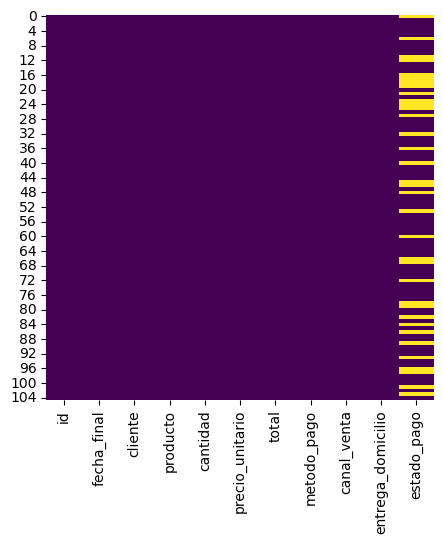

In [28]:
#Se observa alguna correlación:
plt.figure(figsize = (5,5))
sns.heatmap(data.isnull(), cbar = False, cmap = 'viridis')
plt.show()

In [29]:
#Se rellena con  Desconocido` ya que no existe una correlación con otro dato.
data['estado_pago'] = data['estado_pago'].fillna('Desconocido')

# **Data lista para su posterior análisis**:

In [31]:
data.sample(10)

,id,fecha_final,cliente,producto,cantidad,precio_unitario,total,metodo_pago,canal_venta,entrega_domicilio,estado_pago
73,74,2025-03-19,Stephanie Singleton,Informe De Riesgo,3,290.67,872.01,Tarjeta De Crédito,Referido,No,Pagado
35,36,2024-12-03,Joshua Cervantes,Asesoría Financiera,5,204.69,1023.45,Tarjeta De Crédito,Referido,No,Pagado
94,95,2025-03-17,Marcus Warren,Asesoría Financiera,2,255.07,510.14,Tarjeta De Crédito,Referido,No,Pendiente
45,46,2024-11-09,Wendy Porter,Informe De Riesgo,2,148.55,297.10,Tarjeta De Crédito,Referido,Sí,Desconocido
52,53,2024-12-15,Andrea Rivera,Plan Contable Básico,3,166.25,498.75,Tarjeta De Crédito,Página Web,No,Pagado
26,27,2024-11-29,Daisy Garner,Simulación De Inversión,4,66.02,264.08,Efectivo,Página Web,No,Pendiente
10,11,2024-10-21,Annette Riley,Asesoría Financiera,5,68.37,341.85,Transferencia,Instagram,Sí,Pagado
96,97,2024-11-19,Erika Hahn,Plan Contable Básico,3,273.15,819.45,Transferencia,WhatsApp,No,Desconocido
83,84,2025-01-16,Melvin Sanders,Plan Contable Básico,1,43.50,43.50,Efectivo,WhatsApp,Sí,Pendiente
51,52,2025-04-13,Brandon Neal,Asesoría Financiera,3,73.32,219.96,Tarjeta De Crédito,Referido,Sí,Pendiente


# **Conclusiones Finales**:

El conjunto de datos presentaba diversas inconsistencias en el formato de varias columnas, lo que dificultaba tanto la exploración inicial como la generación de insights confiables para la toma de decisiones.

Se realizó un proceso de limpieza y estandarización en aquellas columnas que lo requerían, logrando así una mayor uniformidad y coherencia en los datos. El dataset queda preparado y en condiciones óptimas para su posterior análisis y utilización.